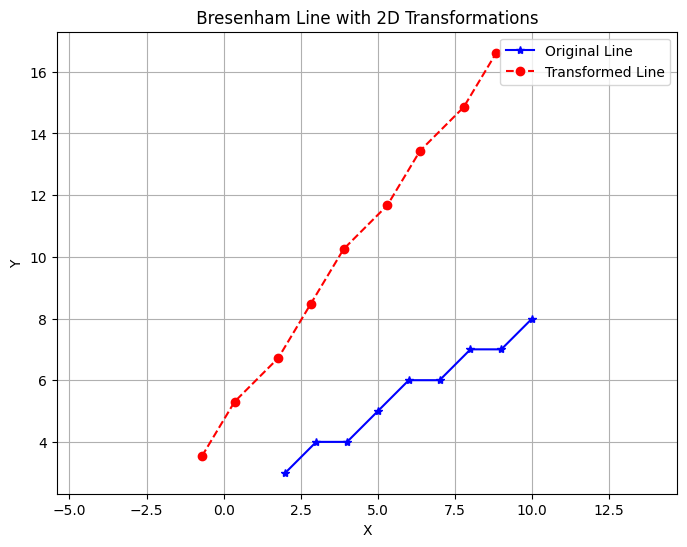

In [1]:
#2D GEOMETRIC TRANSFORMATIONS USING HO-MOGENEOUS COORDINATES
import numpy as np
import matplotlib .pyplot as plt

def bresenham_line (x0 , y0 , x1 , y1):
   xes , yes = [], []
   dx = abs(x1 - x0)
   dy = abs(y1 - y0)
   sx = 1 if x1 >= x0 else -1
   sy = 1 if y1 >= y0 else -1
   x, y = x0 , y0
   if dx >= dy:
     p = 2 * dy - dx
     for _ in range(dx + 1):
      xes.append(x)
      yes.append(y)
      x += sx
      if p >= 0:
        y += sy
        p += 2 * dy - 2 * dx
      else:
        p += 2 * dy
   else:
     p = 2 * dx - dy
     for _ in range(dy + 1):
        xes.append(x)
        yes.append(y)
        y += sy
        if p >= 0:
          x += sx
          p += 2 * dx - 2 * dy
        else:
          p += 2 * dx
   return np.array(xes), np.array(yes)
def apply_2d_transformation (x_coords , y_coords , transformation_matrix ):
   points = np.vstack ([ x_coords , y_coords , np. ones_like (x_coords)])
   transformed_points = transformation_matrix @ points
   return transformed_points [0], transformed_points [1]

def plot_line_with_transformations (x0 , y0 , x1 , y1):
   x_orig , y_orig = bresenham_line (x0 , y0 , x1 , y1)
   # Fixed point (start of line)
   xf , yf = x0 , y0
   scaling_matrix = np.array ([
      [2, 0, 0],
      [0, 0.5, 0],
      [0, 0, 1]
   ])
   T_to_origin = np.array ([
      [1, 0, -xf],
      [0, 1, -yf],
      [0, 0, 1]
   ])
   T_back = np.array ([
      [1, 0, xf],
      [0, 1, yf],
      [0, 0, 1]
   ])
   composite_matrix = T_back @ scaling_matrix @ T_to_origin
   theta = np.pi / 4 # 45 degrees
   rotation_matrix = np.array ([
      [np.cos(theta), -np.sin(theta), 0],
      [np.sin(theta), np.cos(theta), 0],
      [0, 0, 1]
   ])
   composite_matrix = rotation_matrix @ composite_matrix
   x_transformed , y_transformed = apply_2d_transformation ( x_orig , y_orig , composite_matrix )
   plt.figure(figsize =(8, 6))
   plt.plot(x_orig , y_orig , marker='*', color='blue', linestyle='-', label='Original Line')
   plt.plot(x_transformed , y_transformed , marker='o', color='red', linestyle='--', label='Transformed Line')
   plt.title(" Bresenham Line with 2D Transformations ")
   plt.xlabel("X")
   plt.ylabel("Y")
   plt.legend ()
   plt.grid(True)
   plt.axis('equal')
   plt.show ()
plot_line_with_transformations (2, 3, 10, 8)

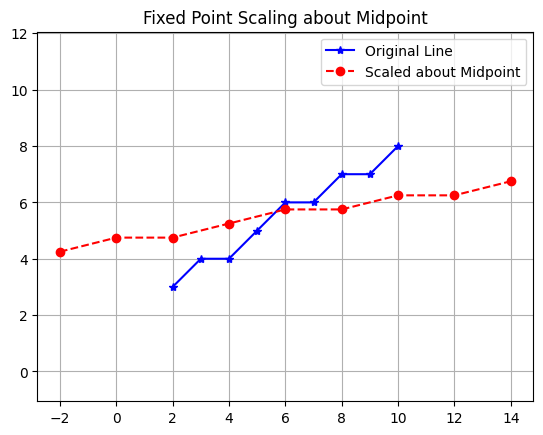

In [3]:
# Change the fixed point to the midpoint of the line and observe the difference

import numpy as np
import matplotlib.pyplot as plt
def bresenham_line(x0, y0, x1, y1):
    xes, yes = [], []
    dx = abs(x1 - x0)
    dy = abs(y1 - y0)
    sx = 1 if x1 >= x0 else -1
    sy = 1 if y1 >= y0 else -1
    x, y = x0, y0
    if dx >= dy:
        p = 2 * dy - dx
        for _ in range(dx + 1):
            xes.append(x)
            yes.append(y)
            x += sx
            if p >= 0:
                y += sy
                p += 2 * dy - 2 * dx
            else:
                p += 2 * dy
    else:
        p = 2 * dx - dy
        for _ in range(dy + 1):
            xes.append(x)
            yes.append(y)
            y += sy
            if p >= 0:
                x += sx
                p += 2 * dx - 2 * dy
            else:
                p += 2 * dx
    return np.array(xes), np.array(yes)
def apply_2d_transformation(x_coords, y_coords, matrix):
    points = np.vstack([x_coords, y_coords, np.ones_like(x_coords)])
    transformed = matrix @ points
    return transformed[0], transformed[1]
def plot_line(x0, y0, x1, y1):
    x_orig, y_orig = bresenham_line(x0, y0, x1, y1)
    xm = (x0 + x1) / 2
    ym = (y0 + y1) / 2   
    scaling_matrix = np.array([
        [2, 0, 0],
        [0, 0.5, 0],
        [0, 0, 1]
    ])
    T_to_mid = np.array([
        [1, 0, -xm],
        [0, 1, -ym],
        [0, 0, 1]
    ])
    T_back_mid = np.array([
        [1, 0, xm],
        [0, 1, ym],
        [0, 0, 1]
    ])
    composite_matrix = T_back_mid @ scaling_matrix @ T_to_mid
    x_scaled, y_scaled = apply_2d_transformation(x_orig, y_orig, composite_matrix)
    plt.plot(x_orig, y_orig, 'b*-', label="Original Line")
    plt.plot(x_scaled, y_scaled, 'ro--', label="Scaled about Midpoint")
    plt.legend()
    plt.grid(True)
    plt.axis("equal")
    plt.title("Fixed Point Scaling about Midpoint")
    plt.show()
plot_line(2, 3, 10, 8)

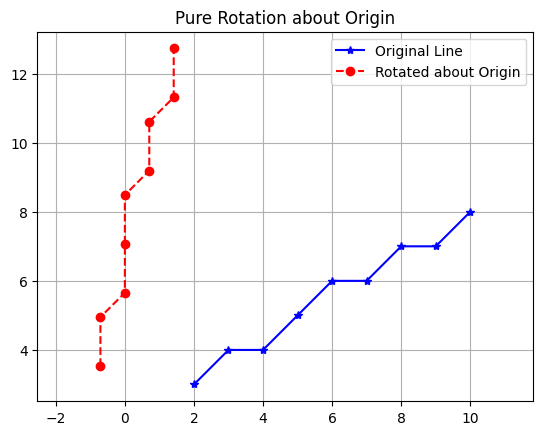

In [4]:
# Implement pure rotation of a line about the origin using the given rotation matrix.

import numpy as np
import matplotlib.pyplot as plt
def bresenham_line(x0, y0, x1, y1):
    xes, yes = [], []
    dx = abs(x1 - x0)
    dy = abs(y1 - y0)
    sx = 1 if x1 >= x0 else -1
    sy = 1 if y1 >= y0 else -1
    x, y = x0, y0
    if dx >= dy:
        p = 2 * dy - dx
        for _ in range(dx + 1):
            xes.append(x)
            yes.append(y)
            x += sx
            if p >= 0:
                y += sy
                p += 2 * dy - 2 * dx
            else:
                p += 2 * dy
    else:
        p = 2 * dx - dy
        for _ in range(dy + 1):
            xes.append(x)
            yes.append(y)
            y += sy
            if p >= 0:
                x += sx
                p += 2 * dx - 2 * dy
            else:
                p += 2 * dx
    return np.array(xes), np.array(yes)
def apply_2d_transformation(x_coords, y_coords, matrix):
    points = np.vstack([x_coords, y_coords, np.ones_like(x_coords)])
    transformed = matrix @ points
    return transformed[0], transformed[1]
def plot_line(x0, y0, x1, y1):
    x_orig, y_orig = bresenham_line(x0, y0, x1, y1)
    theta = np.pi / 4   
    rotation_matrix = np.array([
        [np.cos(theta), -np.sin(theta), 0],
        [np.sin(theta),  np.cos(theta), 0],
        [0, 0, 1]
    ])
    x_rot, y_rot = apply_2d_transformation(x_orig, y_orig, rotation_matrix)
    plt.plot(x_orig, y_orig, 'b*-', label="Original Line")
    plt.plot(x_rot, y_rot, 'ro--', label="Rotated about Origin")
    plt.legend()
    plt.grid(True)
    plt.axis("equal")
    plt.title("Pure Rotation about Origin")
    plt.show()
plot_line(2, 3, 10, 8)